In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = keras.datasets.fashion_mnist
((train_images, train_ids), (test_images, test_ids)) = dataset.load_data()

In [3]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
train_ids

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
len(train_images)

60000

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(train_ids)

60000

In [9]:
test_ids.shape

(10000,)

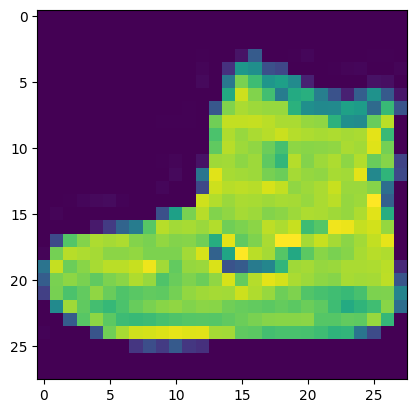

In [10]:
plt.imshow(train_images[0])

---
## Starting model

Showing the categories

Text(0.5, 1.0, '9')

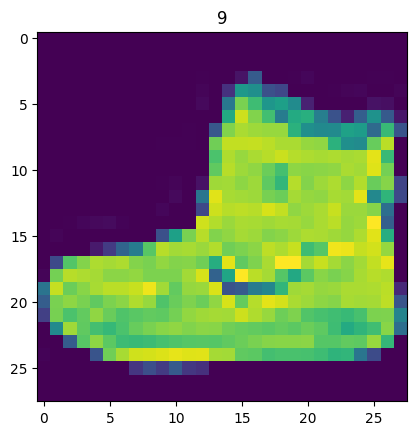

In [11]:
plt.imshow(train_images[0])
plt.title(train_ids[0])

In [12]:
train_ids

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
train_ids.min()

0

In [14]:
train_ids.max()

9

In [15]:
total_ids = 10

In [16]:
ids_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

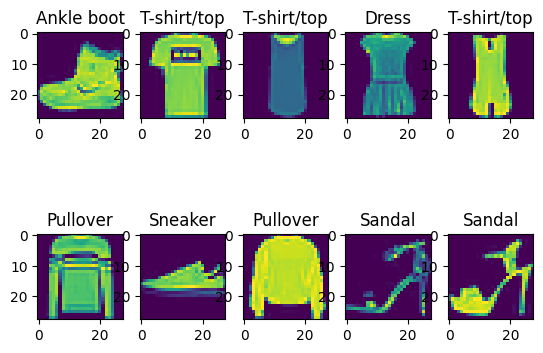

In [17]:
for image in range(10):
    plt.subplot(2, 5, image+1)
    plt.imshow(train_images[image])
    plt.title(ids_names[train_ids[image]])

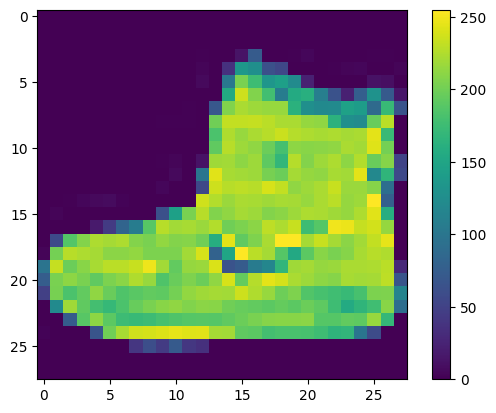

In [18]:
plt.imshow(train_images[0])
plt.colorbar()

---

In [19]:
# modelo = keras.Sequential([ 
#     keras.layers.Flatten(input_shape=(28, 28)),
#     keras.layers.Dense(256, activation=tf.nn.relu),
#     keras.layers.Dense(10, activation=tf.nn.softmax)
# ])

In [20]:
train_images = train_images/255.0 # Normalization 

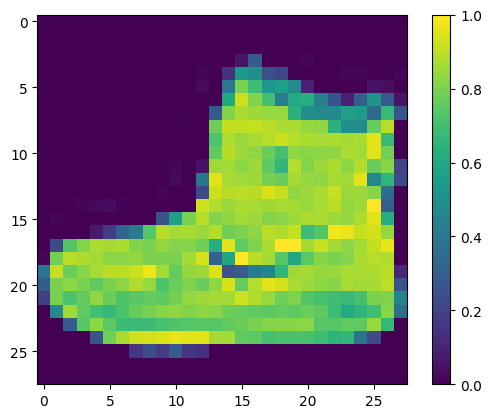

In [21]:
plt.imshow(train_images[0])
plt.colorbar()

In [22]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(28,28)),
        keras.layers.Flatten(),
        
        keras.layers.Dense(256, activation=tf.nn.relu),
        keras.layers.Dropout(0.2),
        
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ]
)

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(train_images, train_ids, epochs=5, validation_split=0.25)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7680 - loss: 0.6725 - val_accuracy: 0.8496 - val_loss: 0.4220
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8497 - loss: 0.4134 - val_accuracy: 0.8578 - val_loss: 0.4008
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8663 - loss: 0.3671 - val_accuracy: 0.8667 - val_loss: 0.3646
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8738 - loss: 0.3437 - val_accuracy: 0.8683 - val_loss: 0.3601
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8813 - loss: 0.3164 - val_accuracy: 0.8745 - val_loss: 0.3443


In [25]:
tests = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [26]:
print(np.argmax(tests[2]), test_ids[2])

1 1


In [27]:
model.evaluate(test_images, test_ids)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8593 - loss: 50.8730


[52.60324478149414, 0.8605999946594238]

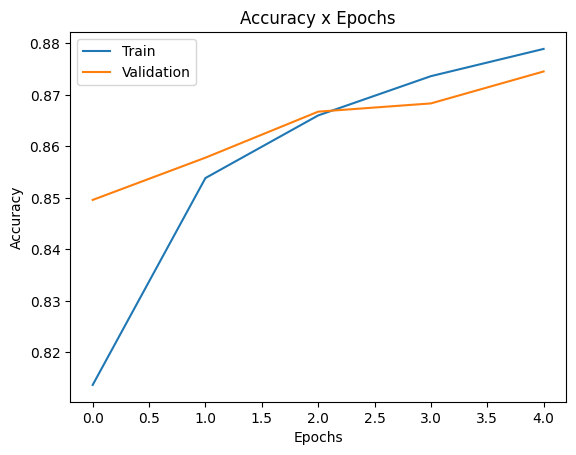

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy x Epochs')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Validation'])

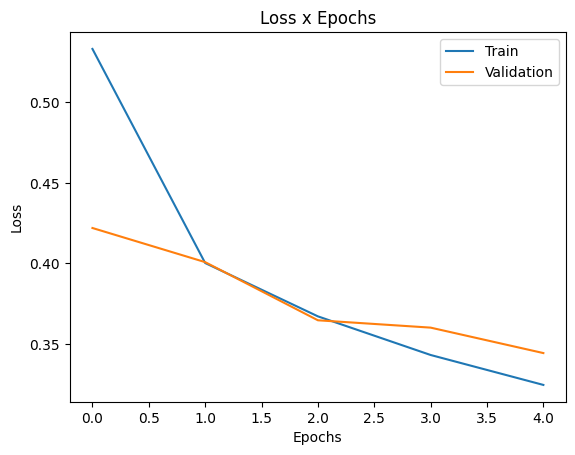

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss x Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train', 'Validation'])

In [33]:
model.save('mnist_clothes_model.keras')

In [36]:
from tensorflow.keras.models import load_model
saved_model = load_model('mnist_clothes_model.keras', custom_objects={'softmax_v2': tf.nn.softmax})

c:\Users\Henrique\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [37]:
tests_saved_model = saved_model.predict(test_images)
print(np.argmax(tests_saved_model[1]), test_ids[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
2 2
